# Earthquake Prediction

In [81]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sqlalchemy import create_engine
import xgboost as xgb

In [98]:
df=pd.read_csv('all_month.csv')

### Features in the dataset

* time ---------------------- Time when the event occurred. Times are reported in milliseconds since the epoch 
* latitude ------------------- Decimal degrees latitude. Negative values for southern latitudes.
* longitude ------------------ Decimal degrees longitude. Negative values for western longitudes.
* depth ---------------------- Depth of the event in kilometers.
* mag ------------------------ Magnitude of event occured.
* magType -------------------- The method or algorithm used to calculate the preferred magnitude
* nst ------------------------ The total number of seismic stations used to determine earthquake location.
* gap ------------------------ The largest azimuthal gap between azimuthally adjacent stations (in degrees).
* dmin ----------------------- Horizontal distance from the epicenter to the nearest station (in degrees).
* rms ------------------------ The root-mean-square (RMS) travel time residual, in sec, using all weights.
* net ------------------------- The ID of a data source contributor for event occured.
* id -------------------------- A unique identifier for the event. 
* types ----------------------- A comma-separated list of product types associated to this event.
* place ----------------------- named geographic region near to the event.
* type ------------------------ Type of seismic event.
* locationSource -------------- The network that originally authored the reported location of this event.
* magSource ------------------- Network that originally authored the reported magnitude for this event.
* horizontalError ------------- Uncertainty of reported location of the event in kilometers.
* depthError ------------------ The depth error, three principal errors on a vertical line.
* magError -------------------- Uncertainty of reported magnitude of the event.
* magNst ---------------------- The total number of seismic stations to calculate the magnitude of earthquake.
* status ---------------------- Indicates whether the event has been reviewed by a human.




In [79]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-12T11:56:00.520Z,38.816166,-122.815498,3.51,0.70,md,12.0,96.0,0.008370,0.02,...,2023-04-12T11:57:36.073Z,"7km NW of The Geysers, CA",earthquake,0.48,1.41,0.120,12.0,automatic,nc,nc
1,2023-04-12T11:55:14.650Z,38.815498,-122.812332,2.79,2.12,md,32.0,46.0,0.008080,0.02,...,2023-04-12T11:56:51.241Z,"6km NW of The Geysers, CA",earthquake,0.20,0.38,0.210,29.0,automatic,nc,nc
2,2023-04-12T11:55:05.620Z,38.816166,-122.813164,2.81,2.39,md,33.0,46.0,0.007611,0.03,...,2023-04-12T11:56:41.358Z,"6km NW of The Geysers, CA",earthquake,0.18,0.34,0.140,30.0,automatic,nc,nc
3,2023-04-12T11:54:42.670Z,38.829834,-122.809998,2.75,1.02,md,7.0,121.0,0.006430,0.03,...,2023-04-12T11:56:16.556Z,"8km NW of The Geysers, CA",earthquake,1.07,1.39,0.080,3.0,automatic,nc,nc
4,2023-04-12T11:51:06.390Z,35.346667,-118.508333,5.24,1.24,ml,14.0,78.0,0.090430,0.13,...,2023-04-12T11:54:36.184Z,"24km NNW of Tehachapi, CA",earthquake,0.26,1.28,0.137,16.0,automatic,ci,ci


In [80]:
df.shape

(12209, 22)

In [41]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,12209.000000,12209.000000,12209.000000,12209.000000,8927.000000,8927.000000,6297.000000,12209.000000,8331.000000,12209.000000,8893.000000,8922.000000
mean,43.490645,-126.464936,21.434156,1.484353,20.128711,128.362055,0.481750,0.285692,1.351124,1.839047,0.232274,15.190316
std,17.630397,58.490002,48.189397,1.123443,21.113378,66.074907,1.776069,0.269474,2.537809,6.103214,0.288828,26.101444
min,-59.586100,-179.957000,-3.200000,-1.320000,0.000000,8.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,35.876000,-155.296000,2.469930,0.800000,7.000000,73.000000,0.014570,0.090000,0.280000,0.420000,0.120000,5.000000
50%,44.611500,-138.750900,6.810000,1.300000,13.000000,116.000000,0.052010,0.170000,0.480000,0.710000,0.178094,9.000000
75%,58.183167,-117.409833,15.610000,1.900000,26.000000,181.000000,0.134200,0.460000,0.840000,1.330000,0.250000,17.000000
max,72.930000,179.994100,648.297000,7.000000,324.000000,346.000000,33.062000,2.990000,21.740000,365.300000,5.360000,715.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12209 entries, 0 to 12208
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             12209 non-null  object 
 1   latitude         12209 non-null  float64
 2   longitude        12209 non-null  float64
 3   depth            12209 non-null  float64
 4   mag              12209 non-null  float64
 5   magType          12209 non-null  object 
 6   nst              8927 non-null   float64
 7   gap              8927 non-null   float64
 8   dmin             6297 non-null   float64
 9   rms              12209 non-null  float64
 10  net              12209 non-null  object 
 11  id               12209 non-null  object 
 12  updated          12209 non-null  object 
 13  place            12209 non-null  object 
 14  type             12209 non-null  object 
 15  horizontalError  8331 non-null   float64
 16  depthError       12209 non-null  float64
 17  magError    

##### We can see lots of null values of certain features, but as part of data wrangling and feature engineering we consider only certain features in final dataframe, hence I choose simply drop or ignore the null values

In [43]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3282
gap                3282
dmin               5912
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3878
depthError            0
magError           3316
magNst             3287
status                0
locationSource        0
magSource             0
dtype: int64

##### Visualize latitude and longitude feature from 'df' dataframe to see where the points fall from the feature set

Below data has been taken from 2020-07-05 to 2020-08-04 only for project walkthrough, but for the web application that has been deployed [here](http://srichaditya3098.pythonanywhere.com/) queries real time data that updates every minute.

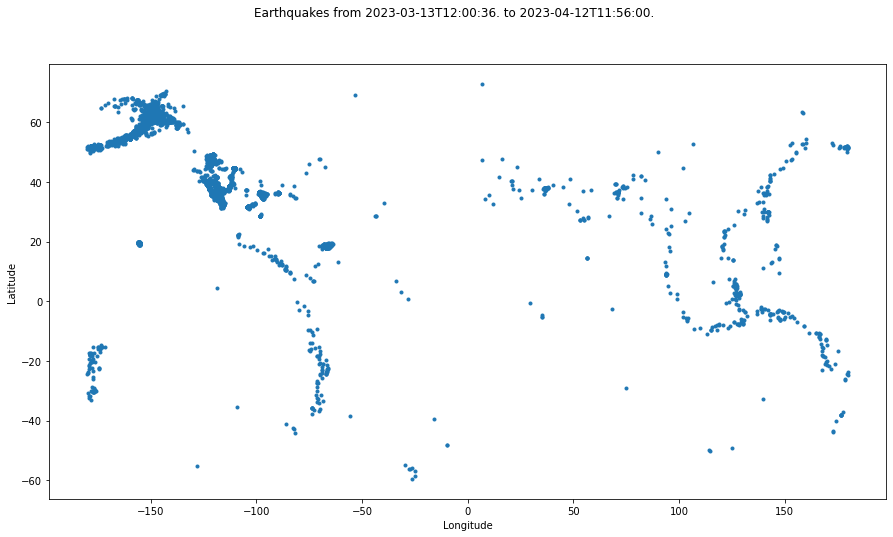

In [44]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))

# latitude and longitude of earthquake site of top 10500 samples.
plt.plot(np.round(df['longitude'].head(10500),rounding_factor), 
         np.round(df['latitude'].head(10500),rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(df['time']))[:20] + ' to ' + str(np.max(df['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Clean up the data by first extracting only date from 'time' column by considering string[ : 10]. hence we can get desired date

In [45]:
df = df.sort_values('time', ascending=True)

#Date extraction
df['date'] = df['time'].str[0:10]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
12208,2023-03-13T12:00:36.847Z,56.174200,-149.585100,10.00,3.20,ml,51.0,196.0,2.30100,0.64,...,"229 km SE of Chiniak, Alaska",earthquake,5.84,2.008,0.057000,40.0,reviewed,us,us,2023-03-13
12207,2023-03-13T12:01:59.247Z,56.205000,-149.626600,10.00,3.20,ml,36.0,222.0,2.26300,0.63,...,"225 km SE of Chiniak, Alaska",earthquake,2.74,2.017,0.066000,30.0,reviewed,us,us,2023-03-13
12206,2023-03-13T12:11:04.470Z,62.385400,-151.138400,77.20,1.20,ml,NaN,NaN,NaN,0.36,...,"22 km WSW of Petersville, Alaska",earthquake,NaN,0.600,NaN,NaN,reviewed,ak,ak,2023-03-13
12205,2023-03-13T12:11:59.930Z,38.897333,-122.867333,1.93,0.80,md,11.0,261.0,0.03929,0.03,...,"9km SSW of Kelseyville, CA",earthquake,0.74,1.190,0.226000,12.0,reviewed,nc,nc,2023-03-13
12204,2023-03-13T12:20:40.330Z,17.981500,-66.970000,45.56,2.54,md,9.0,167.0,0.07166,0.09,...,"5 km W of Fuig, Puerto Rico",earthquake,0.58,0.770,0.171071,8.0,reviewed,pr,pr,2023-03-13


##### Data cleaning for seperating 'place' column. hence only consider city by seperating string by ', '

In [46]:
# only keep the columns needed
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]
# df['date'] = df['time'].str.split(', ', expand=True) 
newdf = df['place'].str.split(', ', expand=True) 


In [47]:
newdf.head()

,0,1,2
12208,229 km SE of Chiniak,Alaska,None
12207,225 km SE of Chiniak,Alaska,None
12206,22 km WSW of Petersville,Alaska,None
12205,9km SSW of Kelseyville,CA,None
12204,5 km W of Fuig,Puerto Rico,None


In [48]:
df['place'] = newdf[1]
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

In [49]:
df.head()

,date,latitude,longitude,depth,mag,place
12208,2023-03-13,56.174200,-149.585100,10.00,3.20,Alaska
12207,2023-03-13,56.205000,-149.626600,10.00,3.20,Alaska
12206,2023-03-13,62.385400,-151.138400,77.20,1.20,Alaska
12205,2023-03-13,38.897333,-122.867333,1.93,0.80,CA
12204,2023-03-13,17.981500,-66.970000,45.56,2.54,Puerto Rico


In [50]:
print('total locations:',len(set(df['place'])))

total locations: 95


#### Bar plot of mean magnitude vs place, as we can see from the graph, only few countries are considered as epicenter or dangerous since they have magnitude more than 2.8 (I have considered here)

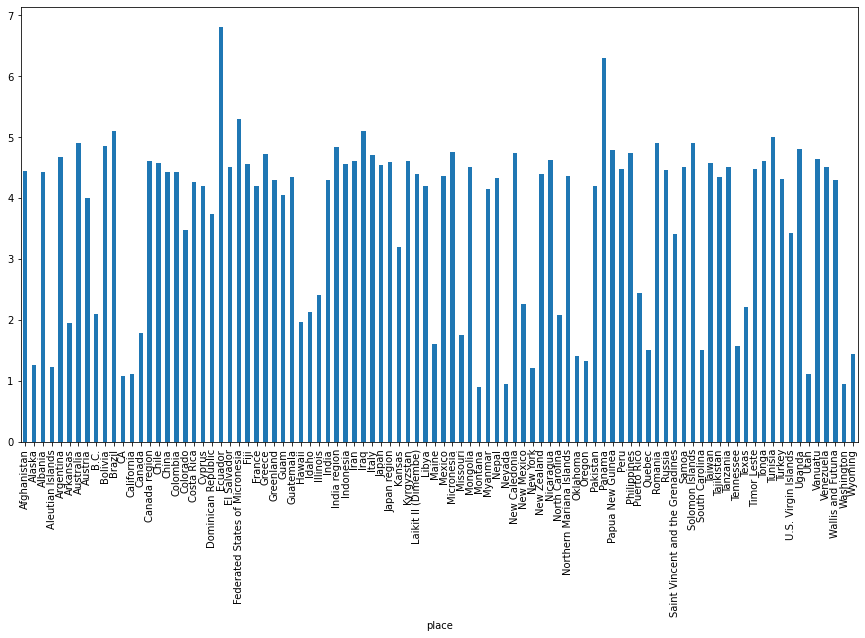

In [51]:
df.groupby(['place'])['mag'].mean().plot(kind='bar',figsize=(15,8));

<AxesSubplot:xlabel='place'>

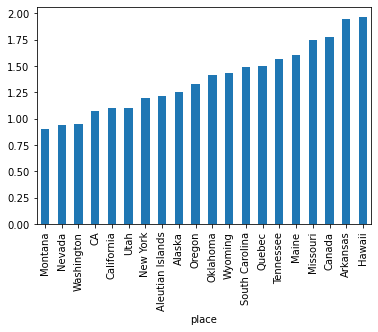

In [52]:
df.groupby(['place'])['mag'].mean().nsmallest(20).plot(kind='bar')

<AxesSubplot:xlabel='place'>

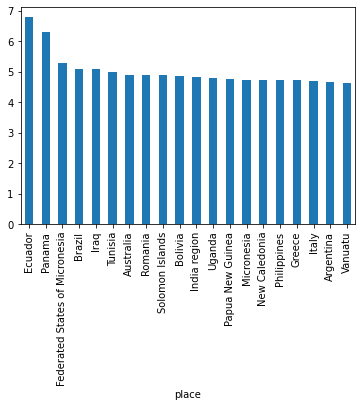

In [53]:
df.groupby(['place'])['mag'].mean().nlargest(20).plot(kind='bar')

In [54]:
more_dangerous_places=df.groupby('place')['mag'].mean()
more_dangerous_places=more_dangerous_places[more_dangerous_places>3]

##### Lets consider 3 as threshold for how high the earthquake has hit and lets visualise countries with more than 3 magnitude.

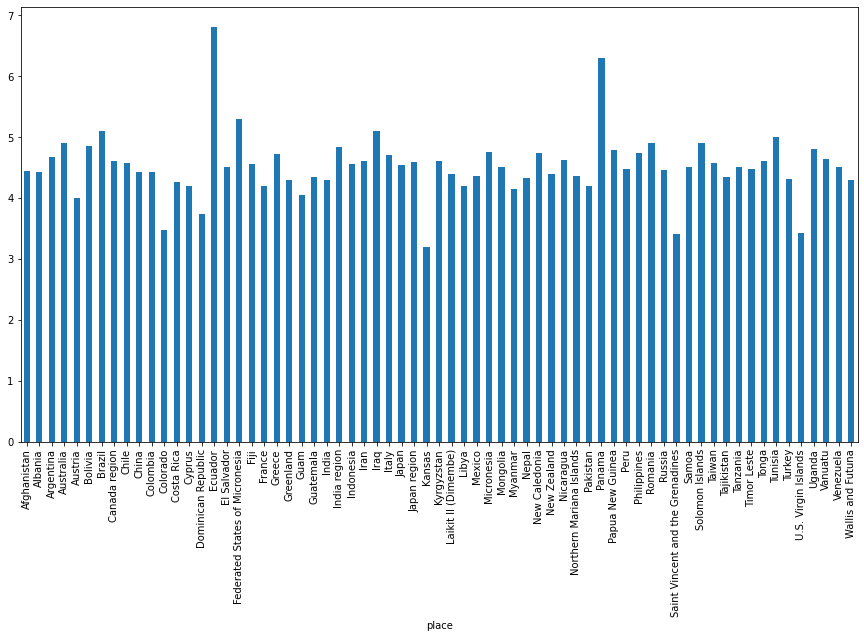

In [55]:
more_dangerous_places.plot(kind='bar',figsize= (15,8));

In [56]:
# calculate mean latitude and longitude for simplified locations

df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place', 'latitude', 'longitude']]

In [57]:
df_coords.head()

,place,latitude,longitude
0,Afghanistan,36.208935,70.727129
1,Alaska,57.907929,-158.039976
2,Albania,40.427933,20.677600
3,Aleutian Islands,52.259693,-160.112324
4,Argentina,-27.437281,-66.784112


#### Merge the two dataframes of mean latitude and longitude locations calculated above with dataframe only considering ['date' , 'depth', 'mag', 'place'] as columns out of total features

In [58]:
df = df[['date', 'depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df.head()

print('total locations:',len(set(df['place'])))

total locations: 94


In [59]:
print(set(df['place']))

{'Nepal', 'U.S. Virgin Islands', 'Indonesia', 'Dominican Republic', 'Oregon', 'Timor Leste', 'Austria', 'Texas', 'Argentina', 'Russia', 'Samoa', 'New York', 'Pakistan', 'Mongolia', 'Peru', 'Taiwan', 'Laikit II (Dimembe)', 'B.C.', 'Libya', 'Ecuador', 'Utah', 'India', 'Guatemala', 'Greenland', 'Oklahoma', 'Cyprus', 'Tonga', 'Wyoming', 'France', 'New Zealand', 'Puerto Rico', 'Albania', 'Italy', 'Mexico', 'Chile', 'El Salvador', 'California', 'Tanzania', 'Micronesia', 'Quebec', 'Colombia', 'Solomon Islands', 'North Carolina', 'Myanmar', 'Arkansas', 'Venezuela', 'CA', 'Wallis and Futuna', 'Nevada', 'Panama', 'Brazil', 'Uganda', 'Iraq', 'Northern Mariana Islands', 'Tajikistan', 'Idaho', 'Canada', 'Romania', 'Kyrgyzstan', 'Canada region', 'Australia', 'Federated States of Micronesia', 'New Mexico', 'Fiji', 'Japan region', 'Tunisia', 'Aleutian Islands', 'Montana', 'Missouri', 'South Carolina', 'Tennessee', 'Hawaii', 'Nicaragua', 'Vanuatu', 'Turkey', 'Japan', 'Illinois', 'Saint Vincent and the 

In [60]:
df.head()

,date,depth,mag,place,latitude,longitude
0,2023-03-13,10.00,3.20,Alaska,57.907929,-158.039976
1,2023-03-13,10.00,3.20,Alaska,57.907929,-158.039976
2,2023-03-13,77.20,1.20,Alaska,57.907929,-158.039976
3,2023-03-13,4.28,1.85,Alaska,57.907929,-158.039976
4,2023-03-13,-1.80,1.02,Alaska,57.907929,-158.039976


#### Feature Engineering and Data wrangling

* Set rolling window size for future prediction based on past values with fixed window size in past
* I have created 6 new features based on rolling window size on average depth and average magnitude.
* A final outcome 'mag_outcome' has been defined as target values and the output is considered as shifted values from set rolling window of past days eg: '7'. 

In [61]:
eq_tmp = df.copy()

#rolling window size
DAYS_OUT_TO_PREDICT = 7

# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    #avg. depth of 22 days rolling period and so on..
    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean() 
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean() 
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(DAYS_OUT_TO_PREDICT))

    eq_data.append(temp_df)

In [62]:
# concat all location-based dataframes into master dataframe
eq_all = pd.concat(eq_data)

In [63]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
11412,2023-03-24,29.343,4.20,Nepal,28.666633,84.906800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11413,2023-04-01,10.000,4.50,Nepal,28.666633,84.906800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11414,2023-04-08,57.329,4.30,Nepal,28.666633,84.906800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11264,2023-03-15,30.000,3.53,U.S. Virgin Islands,18.927290,-64.756906,NaN,NaN,NaN,NaN,NaN,NaN,3.438571
11265,2023-03-16,16.000,3.84,U.S. Virgin Islands,18.927290,-64.756906,NaN,NaN,NaN,NaN,NaN,NaN,3.340000


In [64]:
# remove any NaN fields
eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]

In [65]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
10617,2023-03-19,63.378,5.0,Indonesia,-2.499891,122.951879,57.042773,45.092867,50.307143,4.445455,4.500000,4.714286,4.671429
10618,2023-03-19,10.000,4.8,Indonesia,-2.499891,122.951879,50.359045,45.092867,25.824000,4.472727,4.553333,4.785714,4.657143
10619,2023-03-20,110.900,4.4,Indonesia,-2.499891,122.951879,52.621182,50.632467,34.568286,4.472727,4.553333,4.700000,4.685714
10620,2023-03-20,55.638,4.5,Indonesia,-2.499891,122.951879,53.559273,50.537467,41.062429,4.486364,4.586667,4.657143,4.700000
10621,2023-03-21,10.000,4.9,Indonesia,-2.499891,122.951879,53.559273,47.628133,40.999000,4.513636,4.620000,4.657143,4.628571


#### location after feature engineering

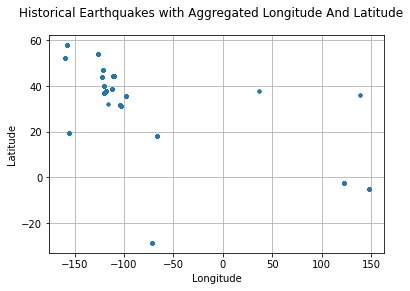

In [66]:
plt.plot(eq_all['longitude'], 
         eq_all['latitude'],
         linestyle='none', marker='.')
plt.suptitle('Historical Earthquakes with Aggregated Longitude And Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()


In [67]:
# keep our live data for predictions
eq_data_last_days_out = pd.concat(eq_data_last_days_out)


eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['mag_avg_22'])]
predict_unknown=eq_data_last_days_out

In [68]:
# here 'mag_outcome' has NaN because these are future outcome event to be predicted live or data that has not yet been witnessed
predict_unknown

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
10667,2023-04-08,104.830,4.8,Indonesia,-2.499891,122.951879,63.889273,74.028733,87.098714,4.563636,4.606667,4.571429,NaN
10668,2023-04-08,158.980,4.4,Indonesia,-2.499891,122.951879,67.893455,83.939467,90.935857,4.563636,4.606667,4.600000,NaN
10669,2023-04-09,64.708,4.6,Indonesia,-2.499891,122.951879,69.811773,85.865200,98.751286,4.550000,4.640000,4.514286,NaN
10670,2023-04-10,54.828,5.1,Indonesia,-2.499891,122.951879,71.199273,88.853733,94.491571,4.586364,4.680000,4.585714,NaN
10671,2023-04-10,67.183,5.1,Indonesia,-2.499891,122.951879,72.607045,91.063467,73.239857,4.627273,4.726667,4.700000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,2023-04-12,29.700,3.2,Alaska,57.907929,-158.039976,39.209091,47.020000,67.485714,1.700000,1.813333,1.885714,NaN
4950,2023-04-12,12.100,1.2,Alaska,57.907929,-158.039976,39.709091,47.240000,55.071429,1.677273,1.726667,1.814286,NaN
4951,2023-04-12,33.800,1.5,Alaska,57.907929,-158.039976,41.245455,49.493333,33.014286,1.668182,1.706667,1.757143,NaN
4952,2023-04-12,97.000,2.0,Alaska,57.907929,-158.039976,45.640909,54.853333,35.700000,1.700000,1.766667,1.800000,NaN


##### considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.

In [69]:
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
print(eq_all['mag_outcome'].describe())
eq_all['mag_outcome'].value_counts()

count    10379.000000
mean         0.019848
std          0.139484
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: mag_outcome, dtype: float64


0    10173
1      206
Name: mag_outcome, dtype: int64

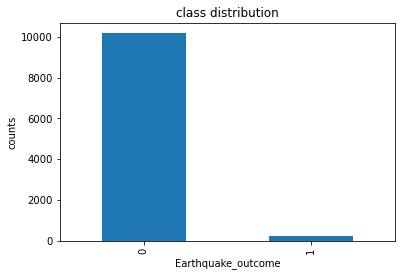

In [70]:
eq_all['mag_outcome'].value_counts().plot(kind='bar',)
plt.xlabel('Earthquake_outcome')
plt.ylabel('counts')
plt.title('class distribution');

In [71]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
10617,2023-03-19,63.378,5.0,Indonesia,-2.499891,122.951879,57.042773,45.092867,50.307143,4.445455,4.500000,4.714286,1
10618,2023-03-19,10.000,4.8,Indonesia,-2.499891,122.951879,50.359045,45.092867,25.824000,4.472727,4.553333,4.785714,1
10619,2023-03-20,110.900,4.4,Indonesia,-2.499891,122.951879,52.621182,50.632467,34.568286,4.472727,4.553333,4.700000,1
10620,2023-03-20,55.638,4.5,Indonesia,-2.499891,122.951879,53.559273,50.537467,41.062429,4.486364,4.586667,4.657143,1
10621,2023-03-21,10.000,4.9,Indonesia,-2.499891,122.951879,53.559273,47.628133,40.999000,4.513636,4.620000,4.657143,1


In [73]:
predict_unknown.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
10667,2023-04-08,104.830,4.8,Indonesia,-2.499891,122.951879,63.889273,74.028733,87.098714,4.563636,4.606667,4.571429,NaN
10668,2023-04-08,158.980,4.4,Indonesia,-2.499891,122.951879,67.893455,83.939467,90.935857,4.563636,4.606667,4.600000,NaN
10669,2023-04-09,64.708,4.6,Indonesia,-2.499891,122.951879,69.811773,85.865200,98.751286,4.550000,4.640000,4.514286,NaN
10670,2023-04-10,54.828,5.1,Indonesia,-2.499891,122.951879,71.199273,88.853733,94.491571,4.586364,4.680000,4.585714,NaN
10671,2023-04-10,67.183,5.1,Indonesia,-2.499891,122.951879,72.607045,91.063467,73.239857,4.627273,4.726667,4.700000,NaN


#### Training is done by considering 22, 15, 7 days window past features rolling average and outcome data is shifted to next 7 days as prediction.

In [82]:
# Selection of features that are needed for prediction and hence consider only them rest are just ignored for prediction purpose.

features = [f for f in list(eq_all) if f not in ['date', 'lon_box_mean',
 'lat_box_mean', 'mag_outcome', 'mag', 'place',
 'combo_box_mean',  'latitude',
 'longitude']]

# splitting traing and testing dataset with trainging size = 70% and test = 30%
X_train, X_test, y_train, y_test = train_test_split(eq_all[features],
                     eq_all['mag_outcome'], test_size=0.3, random_state=42)
  

In [83]:
features

['depth',
 'depth_avg_22',
 'depth_avg_15',
 'depth_avg_7',
 'mag_avg_22',
 'mag_avg_15',
 'mag_avg_7']

#### Training phase

* Models used are : 
    * Adaboost classifier with DecisionTree 
    * Adaboost classifier with RandomForest
    * GridSearch CV as hyper parameter tunning
    

* Model used for Deployment of application :
    * Xgboost with parameters set from above models

#### Adaboost Decision Tree Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
              "base_estimator__max_depth" :   [2,5,7],
              "n_estimators": [200, 400, 600]
             }

# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6,
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

#### Parameter tunning with GridSearch CV

In [87]:
# run grid search
grid_search_ABC = GridSearchCV(ABC,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

In [88]:
grid_search_ABC.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(),
                                          learning_rate=0.6),
             param_grid={'base_estimator__max_depth': [2, 5, 7],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [89]:
pred_ABC=grid_search_ABC.predict(X_test)

### Evaluation Area Under curve & ROC 

I have chose ROC_AUC score as evaluation metric since I have to binary classifify wether earthquake happened or not with given features that has been train on past few days window rolling average window.

 * With **adaboost decision tree classifier** and hyper parameter tunning, we get area under curve (score) = 0.8867
 * higher the auc score, better is the model since it is better at distinguishing postive and negative classes.
 * Make a note here that we get from **confusion matrix**, `False negative = 42`and `Recall score =0.7789`. We need this value apart from auc score that we will analyze later when we have tested with diffferent models below

0.8468487745109081
AUC: 0.8468


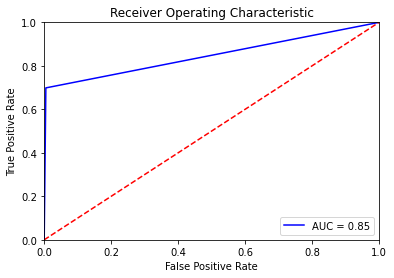

Confusion Matrix: 
 [[3026   15]
 [  22   51]]

Recall 'TP/TP+FN' =  0.6986301369863014


In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print(roc_auc_score(y_test, pred_ABC))

fpr, tpr, _ = roc_curve(y_test, pred_ABC)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print("Confusion Matrix: \n",confusion_matrix(y_test,pred_ABC))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,pred_ABC))

#### Adaboost Random Forest Classifier

In [92]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
# GridSearch of parameter tunning.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [93]:
pred=CV_rfc.predict(X_test)

### Evaluation Area Under curve & ROC 

* Below is the auc score for **adaboost RandomForest classifier** with 0.916 which is slightly lower than Decision tree classifier
* Moreover when we look at **confusion matrix**, `False Negative=38` and `Recall score = 0.8' can be observed which is slightly higher than recall score of decision tree. Thus performs better than decision tree adabooost 

0.8478352921038051
AUC: 0.8478


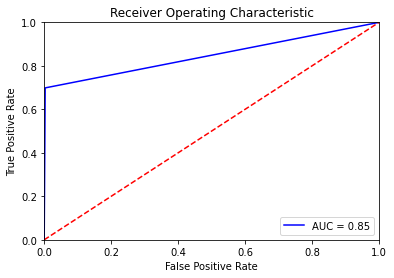

Confusion Matrix: 
 [[3032    9]
 [  22   51]]

Recall 'TP/TP+FN' =  0.6986301369863014


In [94]:

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print("Confusion Matrix: \n",confusion_matrix(y_test,pred))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,pred))

#### XGBoost 
* I have also tested with xgboost model below with similar parameters as I got above, since grid search CV was taking lot of time for xgboost.
 * As we can see this significantly gives higher AUC score of almost 0.0.98 and also `False negative = 37` which is similar Random Forest adaboost but xgboost has higher True positive and less False Positve compared to Random forest adaboost. i.e `Recall score = 0.805` which is similar adaboost Random Forrest tree. But XGboost is really good at classifying positive and negative classes and also better `aur_roc_score = 0.98193`. 

[21:20:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.979458811764335
AUC: 0.9795


E:\Anaconda\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


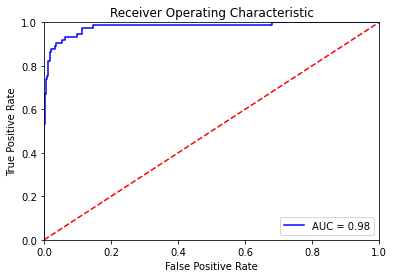

Confusion Matrix: 
 [[3029   12]
 [  19   54]]

Recall 'TP/TP+FN' =  0.7397260273972602


In [95]:
from sklearn.metrics import roc_curve, auc

dtrain = xgb.DMatrix(X_train[features], label=y_train)
dtest = xgb.DMatrix(X_test[features], label=y_test)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

param = {
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'eval_metric': 'auc',
        'max_depth': 6,  # the maximum depth of each tree
        'eta': 0.003,  # the training step for each iteration
        'silent': 1}  # logging mode - quiet}  # the number of classes that exist in this datset
num_round = 5000  # the number of training iterations    
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

print (roc_auc_score(y_test, preds))
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

ypred_bst = np.array(bst.predict(dtest,ntree_limit=bst.best_iteration))
ypred_bst  = ypred_bst > 0.5
ypred_bst = ypred_bst.astype(int)  

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Confusion Matrix: \n",confusion_matrix(y_test,ypred_bst))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,ypred_bst))

We can see above that xgboost algorithm has higher auc score (0.9819) than adaboost decision tree and random forest, as it is evident from the ROC curve. Hence we consider xgboost for prediction of live data

### Final thoughts on which model to consider on application:
* Our main Aim is to predict wether earthquake will happen or not at a given day and place. So we definitely would **not like the model with higher False Neagtive values , since its more dangerous to predict as no earthquake while in reality earthquake happend than predicting earthquake will happen given in reality it did not**. Since its `better safe than sorry!!`, we can allow False positive more than False negative 

* After seeing these comparision on auc_roc score, confusion matrix, and recall score, since all the above algorithm have given similar result with slightly different recall scores, Xgboost with `FN=37` but with higher `auc_score 0f 0.98` performs over-all better. Hence for webapplication deployment, I have chosen Xgboost as it also faster than adaboost

#### Preparing prediction and plot for live unknown data we got in `df_predict` with `mag_outcome = Nan`

In [ ]:

dlive = xgb.DMatrix(df_predict[features]) #, label=[])
preds = bst.predict(dlive)

plt.plot(preds)
plt.show()

### Prediction 

* Select specific features such as `data`,`place`,`long`,`lat` and give earthquake probablity from prediction at that place and date as `quake` probability
* with taking only 7 days rolling period data from predict dataframe since this outcome value is NaN and we need to predict next 7 days period.

In [ ]:
live_set = df_predict[['date', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds
# aggregate down dups
live_set = live_set.groupby(['date', 'place'], as_index=False).mean()

# increment date to include DAYS_OUT_TO_PREDICT
live_set['date']= pd.to_datetime(live_set['date'],format='%Y-%m-%d') 
live_set['date'] = live_set['date'] + pd.to_timedelta(7,unit='d')

live_set.tail()

In [ ]:
import datetime as dt
# convert date to proper format for prediction
days = list(set([d for d in live_set['date'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))
days.sort()

# Predict NaN outcome value in earthquake for next day 1.
predict_day=days[2]
predict_day

In [ ]:
# place, date, lat and long with earthquake probability for next 7 days
for i in range(0,7):
    live_set_tmp = live_set[live_set['date'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

### Final thoughts:


1. So far the model looks good with xgboost as chosen model for predictions in web app haveing higher auc score and higher recall_score as I have explained under XGBoost result section why auc and recall score are chosen.


2. Now its time to deploy the model on web application with flask and I have chosen it to deploy on https://www.pythonanywhere.com/ which is a free hosting cloud platform for web flask applications.


3. Main Idea of Application will be predicting or forecasting these earthquake sites on given day all over the world.


4. The user has option to change the date using a slider and see look at predicted places where earthquake is likely to happen.
